This Project deals with the Unemployment rate in the urbun. The raw data from "https://unemploymentinindia.cmie.com/kommon/bin/sr.php?kall=wtabnav&tab=4020" for the urban
population has been done and manipulated to the useful information. Unemployment rate in UT's and states are  used for the comparision and also over all unemployment rate in 
India is also plotted.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
monthly = pd.read_csv('Unemployment_Rate_M_Urban.txt', sep = ',', skiprows = 1)
monthly.head()
monthly.columns = monthly.columns.str.strip()
monthly['Date'] = pd.to_datetime(monthly['Date'])

monthly['is_UT'] = 'States';
UT = ['Delhi', 'Chandigarh', 'Puducherry']
monthly.head()
monthly['is_UT'][monthly['Region'] == 'India'] = 'India Urban' ;

C:\Users\427670\AppData\Local\Temp/ipykernel_3548/2857060974.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly['is_UT'][monthly['Region'] == 'India'] = 'India Urban' ;


In [15]:
for key, i in monthly['Region'].items():
    if i in UT:
        monthly['is_UT'][key] = 'UTs'

C:\Users\427670\AppData\Local\Temp/ipykernel_3548/3543179024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly['is_UT'][key] = 'UTs'


In [26]:
monthly['Month'] = pd.DatetimeIndex(monthly['Date']).month
monthly['Year'] = pd.DatetimeIndex(monthly['Date']).year
monthly.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),is_UT,Month,Year
0,Andhra Pradesh,2016-01-31,M,20.17,5222629.0,52.25,States,1,2016
1,Andhra Pradesh,2016-02-29,M,9.73,5455744.0,48.18,States,2,2016
2,Andhra Pradesh,2016-03-31,M,15.63,5332391.0,50.27,States,3,2016
3,Andhra Pradesh,2016-04-30,M,9.68,4883600.0,42.92,States,4,2016
4,Andhra Pradesh,2016-05-31,M,7.34,5289416.0,45.22,States,5,2016


In [45]:
monthly['is_UT'].unique()
grp_by_month = monthly.groupby(['is_UT','Year','Month']).mean()
grp_by_month = grp_by_month.reset_index()

In [46]:

import calendar
grp_by_month['Month'] = grp_by_month['Month'].apply(lambda x: calendar.month_abbr[x])
grp_by_month.head()

,is_UT,Year,Month,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,India Urban,2016,Jan,10.44,126712317.0,45.07
1,India Urban,2016,Feb,10.38,126547452.0,44.89
2,India Urban,2016,Mar,11.56,125958829.0,45.18
3,India Urban,2016,Apr,11.22,126691363.0,45.18
4,India Urban,2016,May,12.10,126663583.0,45.52


In [30]:
x_labels = grp_by_month['Month'].astype(str) +  grp_by_month['Year'].astype(str).map(lambda x: x[2:])

x_labels[:5]

0    Jan16
1    Feb16
2    Mar16
3    Apr16
4    May16
dtype: object

[Text(0, 0, '0%'),
 Text(0, 5, '5%'),
 Text(0, 10, '10%'),
 Text(0, 15, '15%'),
 Text(0, 20, '20%'),
 Text(0, 25, '25%'),
 Text(0, 30, '30%'),
 Text(0, 35, '35%'),
 Text(0, 40, '40%'),
 Text(0, 45, '45%'),
 Text(0, 50, '50%'),
 Text(0, 55, '55%')]

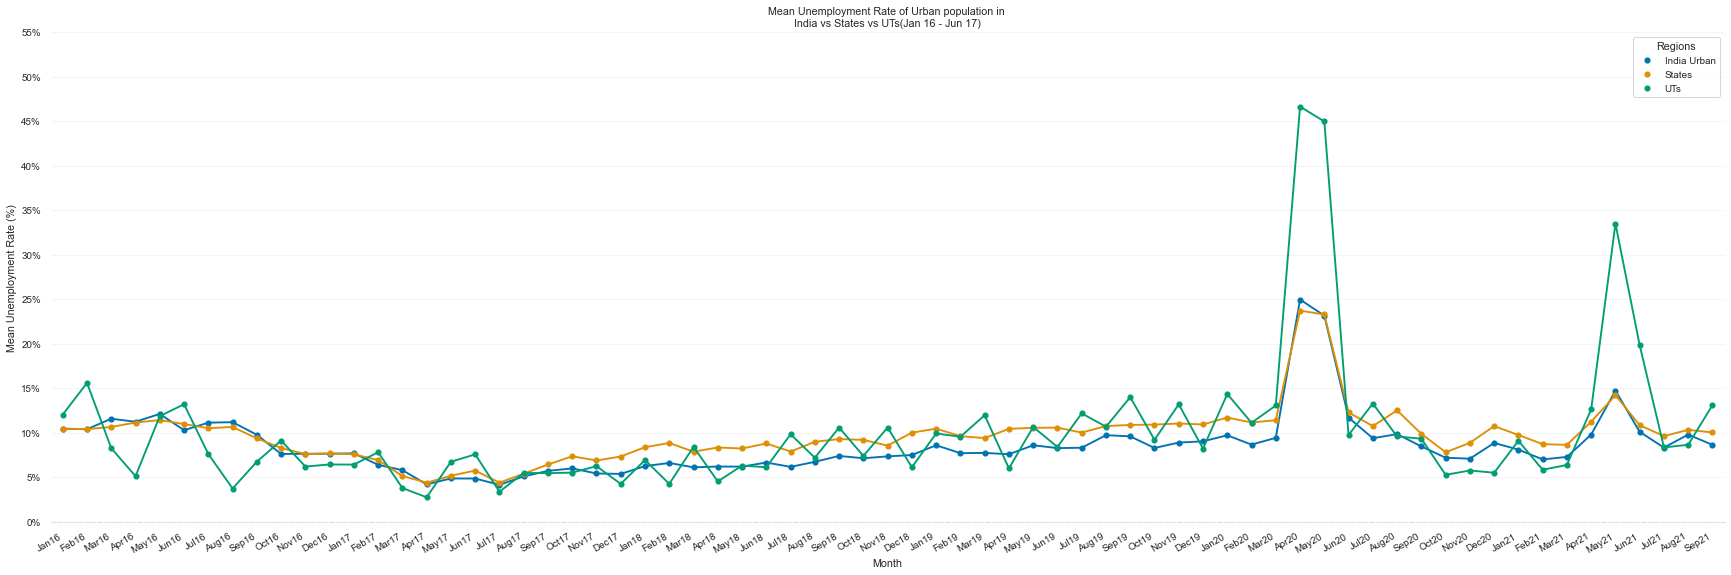

In [51]:
import seaborn as sns
fig = plt.figure(figsize=(30,10))

sns.pointplot(x = x_labels, y = 'Estimated Unemployment Rate (%)', hue = 'is_UT', data = grp_by_month, palette = "colorblind", scale = 0.7, linewidth = '')

# Aesthetics
sns.set_style("white", {'font-family': [u'Arial']})
sns.set_context('notebook', font_scale=.90)

# plt.plot(x_labels,color='darkorange', linewidth=0.8)

sns.despine(left = True)
plt.xlabel('Month')
plt.ylabel('Mean Unemployment Rate (%)')
plt.title('Mean Unemployment Rate of Urban population in \nIndia vs States vs UTs(Jan 16 - Jun 17)')

plt.gca().spines['bottom'].set_color('#e1e1e1')
plt.gca().spines['bottom'].set_linestyle('--')
fig.autofmt_xdate()
# plt.gca().set_ylim(0,60)
plt.gca().set_yticks(range(0,60,5))
plt.gca().yaxis.grid(which = 'major', color = '#e1e1e1', linestyle = '--', linewidth = 0.5)

# Customize legend
plt.legend(title='Regions')

ylabs = plt.gca().get_yticks().astype(int).astype(str)
ylabs  = [str(x) + '%' for x in ylabs]
plt.gca().set_yticklabels(ylabs)

ylabs = plt.gca().get_yticks().astype(int).astype(str)
ylabs  = [str(x) + '%' for x in ylabs]
plt.gca().set_yticklabels(ylabs)

Analysis: 

This visualization was concerned with answering the question of how the unemployment rate of Union Territories of India have changed against Indian States and India Overall over the past one and half year for Urban population. The data was collected from CMIE website. CMIE stands for Centre for Monitoring Indian Economy that conducts monthly and weekly surveys over 160,000+ households. Mean employment rates for states and union territories were calculated to help the reader identify any major trends and variations from it.

The Unemployment rate witnesses a decreasing trend over the past 1.5 years from as high as 10.5% in Jan 2016 to 4.5% in Jun 2017. The Union Territories seem to have a very volatile unemployment rate movement by virtue of their population compared to rest of the regions. In the months of February this rate increases each year and similarly in the month of May. The month of April usually has low unemployment rates in Union Territories.

And the March 20 there is a sudden increase in the unemployment due nation wide lock down. The steep is more in UTs rather other states, this shows, UT's affected more than the states in 1st Lock down. The same situation in March 21 to July 21 which was the period of second lock down.